A huge number of coding interview problems involve dealing with `Permutations` and `Combinations` of a given set of elements. This pattern describes an efficient Breadth First Search (BFS) approach to handle all these problems.




## Combination
###  78. Subsets
####  BFS
To generate all subsets of the given set, we can use the Breadth First Search (BFS) approach. We can start with an empty set, iterate through all numbers one-by-one, and add them to existing sets to create new subsets.

Let’s take the example-2 mentioned above to go through each step of our algorithm:

Given set: [1, 5, 3]

Start with an empty set: [[]]
Add the first number (1) to all the existing subsets to create new subsets: [[], [1]];
Add the second number (5) to all the existing subsets: [[], [1], [5], [1,5]];
Add the third number (3) to all the existing subsets: [[], [1], [5], [1,5], [3], [1,3], [5,3], [1,5,3]].
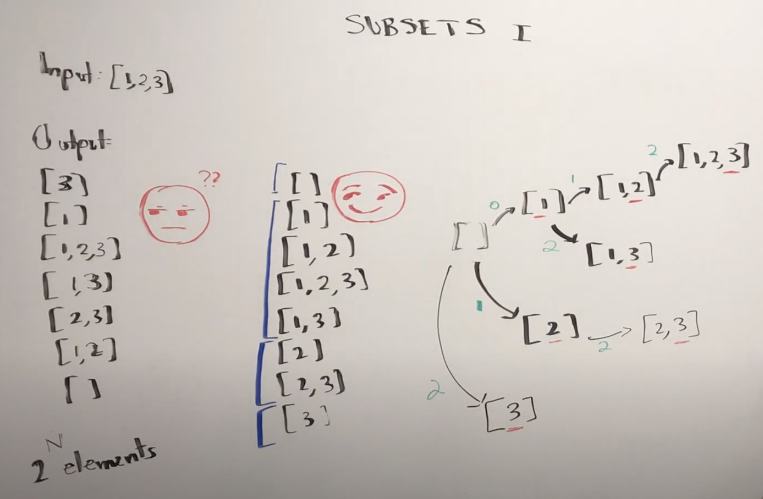
Time complexity:
In each step, the number of subsets doubles as we add each element to all the existing subsets, we will have O(2<sup>N</sup>) subsets, where `N` is the number of element in the input set. Since we construct a new subset from ane existing set, therefore, the time complexity of the above will be O(N*2<sup>N</sup>)
Space complexity:
All the additional space used by algorithm is for the input list, we have a toal of 2<sup>N</sup> subsets, and each subset can take up to O(N) space. Therefore, the space complexity will be O(N*2<sup>N</sup>)
#### DFS
https://www.youtube.com/watch?v=XovjRfHumDU

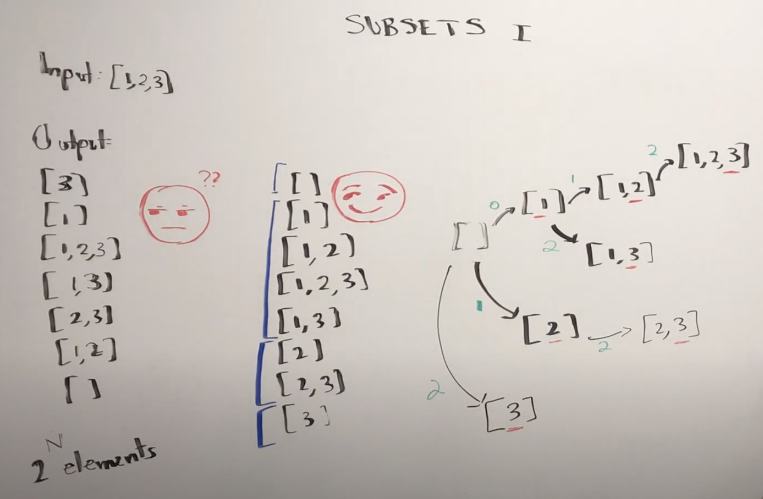
1. Picture our final solution how to build it
2. Branches that started at each element
3. Pointers for number to add
4. Kept track of new subsets
5. Remove added number

In [8]:
# BFS
def find_subsets(nums):
    # start by adding the empty subset
    subsets = []
    subsets.append([])
    for currentNumber in nums:
        # we will take all existing subsets and insert the current number in them to create new subsets
        n = len(subsets)
        for i in range(n):
          # create a new subset from the existing subset and insert the current element to it
          subset = list(subsets[i])
          subset.append(currentNumber)
          subsets.append(subset)

    return subsets


def main():

    print("Here is the list of subsets: " + str(find_subsets([1, 3])))
    print("Here is the list of subsets: " + str(find_subsets([1, 5, 3])))


main()

Here is the list of subsets: [[], [1], [3], [1, 3]]
Here is the list of subsets: [[], [1], [5], [1, 5], [3], [1, 3], [5, 3], [1, 5, 3]]


In [11]:
# DFS
def find_subsets(nums):
    if len(nums) == 0: return []
    res = []
    def dfs(p, res, temp):
        if len(temp) > len(nums):
            return
        res.append(list(temp))
        for i in range(p, len(nums)): # p is a branch pointer from i = 0
            temp.append(nums[i])
            dfs(i + 1, res, temp) # explore more, try to add more elements to existing one; [1], [1,2], [1,2,3]
            temp.pop() # pop 3 and 2, add 3 to [1], pop 3, next go to 2 new branch
    dfs(0, res, [])
    return res
def main():

    print("Here is the list of subsets: " + str(find_subsets([1, 3])))
    print("Here is the list of subsets: " + str(find_subsets([1, 5, 3])))


main()

Here is the list of subsets: [[], [1], [1, 3], [3]]
Here is the list of subsets: [[], [1], [1, 5], [1, 5, 3], [1, 3], [5], [5, 3], [3]]


90. Subsets II: https://leetcode.com/problems/subsets-ii/
#### DFS
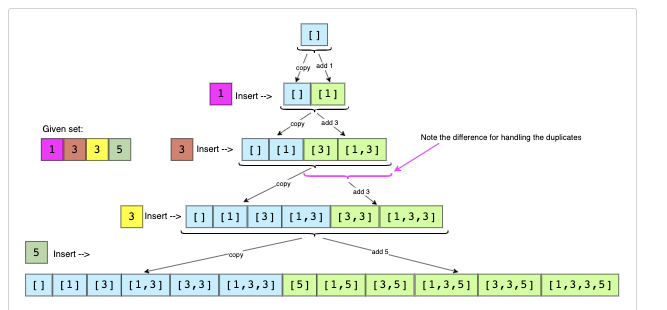
#### BFS
This problem follows the Subsets pattern and we can follow a similar Breadth First Search (BFS) approach. The only additional thing we need to do is handle duplicates. Since the given set can have duplicate numbers, if we follow the same approach discussed in Subsets, we will end up with duplicate subsets, which is not acceptable. To handle this, we will do two extra things:

Sort all numbers of the given set. This will ensure that all duplicate numbers are next to each other.
Follow the same BFS approach but whenever we are about to process a duplicate (i.e., when the current and the previous numbers are same), instead of adding the current number (which is a duplicate) to all the existing subsets, only add it to the subsets which were created in the previous step.
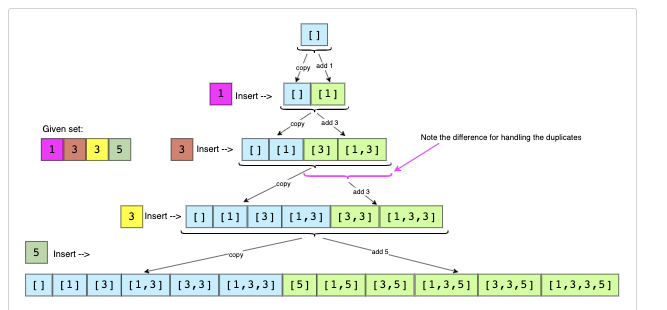

In [ ]:
# DFS
class Solution:
    """
    @param nums: A set of numbers.
    @return: A list of lists. All valid subsets.
    """
    def subsetsWithDup(self, nums):
        res = []
        # 排序
        nums.sort()
        # dfs搜索
        self.dfs(nums, 0, [], res)
        return res
        
    def dfs(self, nums, k, subset, res):
        # 当前组合存入res
        res.append(subset[:])
        # 为subset新增一位元素
        for i in range(k, len(nums)):
            # 剪枝
            if (i != k and nums[i] == nums[i - 1]):
                continue
            subset.append(nums[i])
            # 下一层搜索
            self.dfs(nums, i + 1, subset, res)
            # 回溯
            del subset[-1]

In [2]:
#BFS

def subsetsWithDup(nums):
    # BFS
    if not nums or len(nums) == 0: return []
    # sort the number to handle the duplicate
    nums.sort()
    subsets = []
    subsets.append([])
    startIndex, endIndex = 0, 0
    for i in range(len(nums)):
        startIndex = 0
        # if current and the previous are same, create new subsets only from the subsets added in the previous step
        if i > 0 and nums[i] == nums[i - 1]:
            startIndex = endIndex + 1
        endIndex = len(subsets) - 1
        for j in range(startIndex, endIndex + 1):
            # craete a new subset from the existing subsets and add the current element to it
            sub = list(subsets[j])
            sub.append(nums[i])
            subsets.append(sub)
    return subsets

def main():

    print("Here is the list of subsets: " + str(subsetsWithDup([1, 3, 3])))
    print("Here is the list of subsets: " + str(subsetsWithDup([1, 5, 3, 3])))


main()


Here is the list of subsets: [[], [1], [3], [1, 3], [3, 3], [1, 3, 3]]
Here is the list of subsets: [[], [1], [3], [1, 3], [3, 3], [1, 3, 3], [5], [1, 5], [3, 5], [1, 3, 5], [3, 3, 5], [1, 3, 3, 5]]


## Permutation
Permutation is defined as the re-arranging of the elements of the set. For example, {1, 2, 3} has the following six permutations:

{1, 2, 3}
{1, 3, 2}
{2, 1, 3}
{2, 3, 1}
{3, 1, 2}
{3, 2, 1}
### BFS
This problem follows the Subsets pattern and we can follow a similar Breadth First Search (BFS) approach. However, unlike Subsets, every permutation must contain all the numbers.
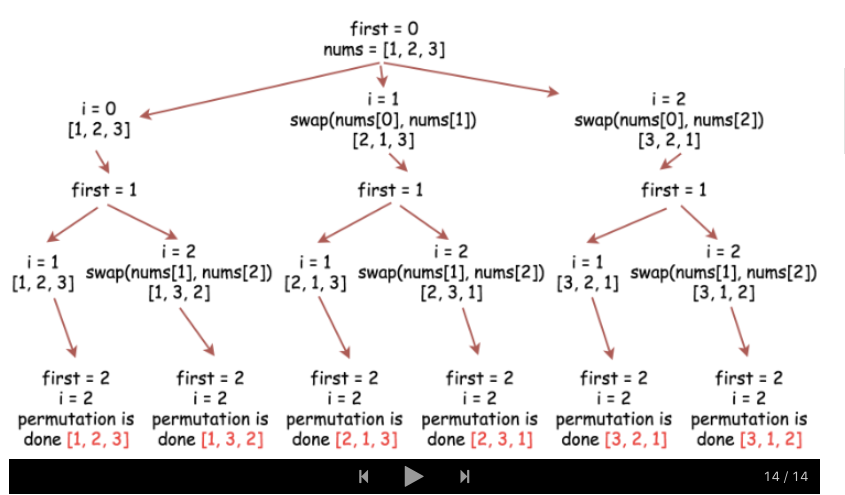
### DFS (backtracking)
Here is a backtrack function which takes the index of the first integer to consider as an argument backtrack(first).

If the first integer to consider has index n that means that the current permutation is done.
Iterate over the integers from index first to index n - 1.
Place i-th integer first in the permutation, i.e. swap(nums[first], nums[i]).
Proceed to create all permutations which starts from i-th integer : backtrack(first + 1).
Now backtrack, i.e. swap(nums[first], nums[i]) back.
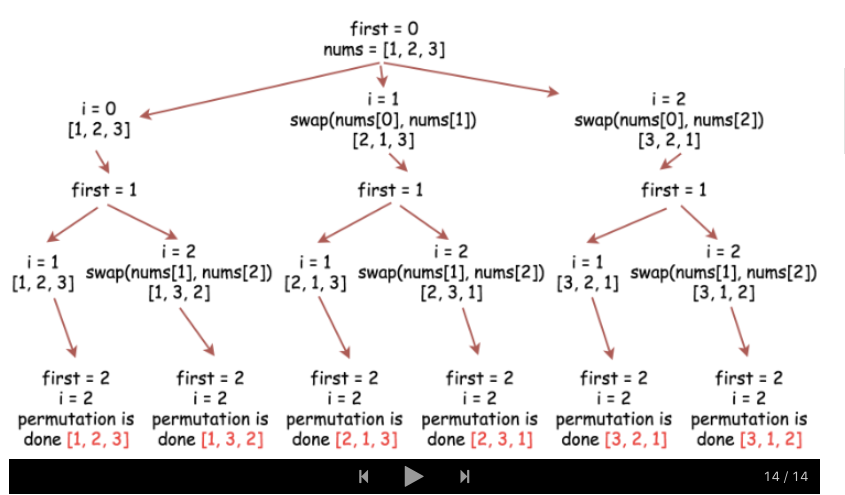

In [7]:
from collections import deque

def find_permutations(nums):
    numsLength = len(nums)
    result = []
    permutations = deque()
    permutations.append([])
    for currentNumber in nums:
        # we will take all existing permutations and add the current number to create new permutations
        n = len(permutations)
        for _ in range(n):
            oldPermutation = permutations.popleft()
            # create a new permutation by adding the current number at every position
            for j in range(len(oldPermutation)+1):
                newPermutation = list(oldPermutation)
                newPermutation.insert(j, currentNumber)
                if len(newPermutation) == numsLength:
                    result.append(newPermutation)
                else:
                    permutations.append(newPermutation)

    return result


def main():
    print("Here are all the permutations: " + str(find_permutations([1, 3, 5])))


main()

Here are all the permutations: [[5, 3, 1], [3, 5, 1], [3, 1, 5], [5, 1, 3], [1, 5, 3], [1, 3, 5]]


Time complexity #
We know that there are a total of N!N! permutations of a set with ‘N’ numbers. In the algorithm above, we are iterating through all of these permutations with the help of the two ‘for’ loops. In each iteration, we go through all the current permutations to insert a new number in them on line 17 (line 23 for C++ solution). To insert a number into a permutation of size ‘N’ will take O(N),O(N), which makes the overall time complexity of our algorithm O(N*N!)O(N∗N!).

Space complexity #
All the additional space used by our algorithm is for the result list and the queue to store the intermediate permutations. If you see closely, at any time, we don’t have more than N!N! permutations between the result list and the queue. Therefore the overall space complexity to store N!N! permutations each containing NN elements will be O(N*N!)O(N∗N!).

In [8]:
# bfs + recursive
def generate_permutations(nums):
    result = []
    generate_permutations_recursive(nums, 0, [], result)
    return result


def generate_permutations_recursive(nums, index, currentPermutation, result):
    if index == len(nums):
        result.append(currentPermutation)
    else:
        # create a new permutation by adding the current number at every position
        for i in range(len(currentPermutation)+1):
            newPermutation = list(currentPermutation)
            newPermutation.insert(i, nums[index])
            generate_permutations_recursive(nums, index + 1, newPermutation, result)


def main():
    print("Here are all the permutations: " + str(generate_permutations([1, 3, 5])))


main()


Here are all the permutations: [[5, 3, 1], [3, 5, 1], [3, 1, 5], [5, 1, 3], [1, 5, 3], [1, 3, 5]]


In [12]:
# dfs + backtracking
class Solution:
    def permute(nums) :
        def dfs(first):
            # if all integers are used up
            if first == n:
                res.append(nums[:])
            for i in range(first, n):
                # place ith integer first
                # in the current permutation
                nums[first], nums[i] = nums[i], nums[first]
                # use next integrs to complete the permutations
                dfs(first + 1)
                # backtrack
                nums[first], nums[i] = nums[i], nums[first]
        n = len(nums)
        res = []
        dfs(0)
        return res
# solution 2 DFS
class Solution:
    def permute(nums):
        if not nums or len(nums) == 0: return []
        res = []
        # visited标记数字是否被访问过
        # 因为是全排列，搜一从0开始for loop，每个位置可以放任何一个数字，但是可能会重复放，所以需要visited array来标记某个数字是没有被用过的
        visited = [False] * len(nums)
        def helper(nums, subset):
            if len(subset) == len(nums): 
                res.append(subset[:])
                return
            for i in range(len(nums)):
                if not visited[i]:
                    visited[i] = True
                    subset.append(nums[i])
                    helper(nums, subset)
                    visited[i] = False
                    subset.pop()
        helper(nums, [])
        return res

In [13]:
### 22. Generate Parentheses: https://leetcode.com/problems/generate-parentheses/
# DFS
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        ans = []
        def dfs(s = '', left = 0, right = 0):
            if len(s) == 2 * n:
                ans.append(s)
            if left < n:
                dfs(s + "(", left + 1, right)
            if right < left:
                dfs(s + ')', left, right + 1)
        dfs()
        return ans



BFS
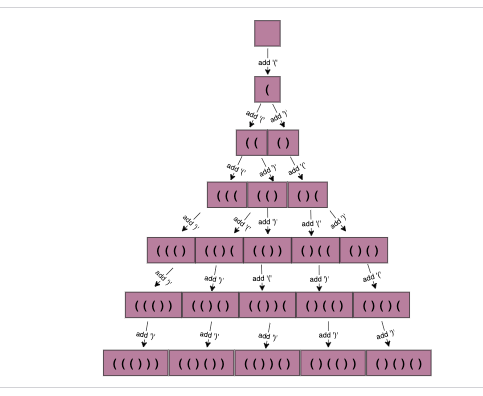

In [16]:
from collections import deque


class ParenthesesString:
    def __init__(self, str, openCount, closeCount):
        self.str = str
        self.openCount = openCount
        self.closeCount = closeCount

def generate_valid_parentheses(num):
    result = []
    queue = deque()
    queue.append(ParenthesesString("", 0, 0))
    while queue:
        ps = queue.popleft()
        # if we've reached the maximum number of open and close parentheses, add to the result
        if ps.openCount == num and ps.closeCount == num:
            result.append(ps.str)
        else:
            if ps.openCount < num:  # if we can add an open parentheses, add it
                queue.append(ParenthesesString(
                  ps.str + "(", ps.openCount + 1, ps.closeCount))

            if ps.openCount > ps.closeCount:  # if we can add a close parentheses, add it
                queue.append(ParenthesesString(ps.str + ")",
                                               ps.openCount, ps.closeCount + 1))

    return result


def main():
    print("All combinations of balanced parentheses are: " +
    str(generate_valid_parentheses(2)))
    print("All combinations of balanced parentheses are: " +
    str(generate_valid_parentheses(3)))


main()

All combinations of balanced parentheses are: ['(())', '()()']
All combinations of balanced parentheses are: ['((()))', '(()())', '(())()', '()(())', '()()()']


In [ ]:
# Unique Generalized Abbreviations (hard): https://leetcode.com/problems/generalized-abbreviation/
